In [1]:
!pip install -q opendatasets

import pandas as pd
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aszadrakin
Your Kaggle Key: ··········


100%|██████████| 172k/172k [00:00<00:00, 64.1MB/s]

In [3]:
data = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.drop(columns=['customerID'],inplace=True)

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
for col in data.columns :
   print(f"{col} : {data[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [9]:
multi_category_features = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies','Contract','PaymentMethod',]
binary_category_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] #,
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
category_features = binary_category_features+multi_category_features

In [10]:
# data[data["TotalCharges"] == " "]["TotalCharges"] = 0.0
data["TotalCharges"] = data["TotalCharges"].replace(" ", 0.0)

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# data["gender"] = label_encoder.fit_transform(data["gender"])

# print(label_encoder.classes_)
# # print("Original DataFrame:")
# # print(df[['class_feature']])

# # print("\nEncoded DataFrame:")
# # print(df[['class_feature', 'class_feature_encoded']])



In [ ]:
#label_mapping["gender"] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#label_mapping
# label_imapping = dict()
# label_imapping["gender"] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
# label_imapping

{'gender': {0: 'Female', 1: 'Male'}}

In [ ]:
# label_imapping["gender"][1]

'Male'

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoder_(df, label_features):
  label_imapper = dict()
  le = LabelEncoder()
  for feature in label_features:
    df[feature] = le.fit_transform(df[feature])
    label_imapper[feature] = dict(zip(le.transform(le.classes_),le.classes_))
  return label_imapper

In [13]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoder_(df, class_features):
  oe = OneHotEncoder()
  for feature in class_features:
    encoded = oe.fit_transform(df[[feature]])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=oe.get_feature_names_out([feature]))
    df = pd.concat([df, encoded_df], axis=1).drop(feature, axis=1)
  # print(df.head())
  return df

In [14]:
from sklearn.preprocessing import StandardScaler

def normalizer_(df, numerical_features):
  normalizers = dict()

  for feature in numerical_features:
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    normalizers[feature] = scaler
  return normalizers

In [15]:
label_imapping = label_encoder_(data, binary_category_features)

In [16]:
label_imapping

{'gender': {0: 'Female', 1: 'Male'},
 'Partner': {0: 'No', 1: 'Yes'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'PhoneService': {0: 'No', 1: 'Yes'},
 'PaperlessBilling': {0: 'No', 1: 'Yes'},
 'Churn': {0: 'No', 1: 'Yes'}}

In [17]:
data = onehot_encoder_(data, multi_category_features)

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: ylabel='Churn'>

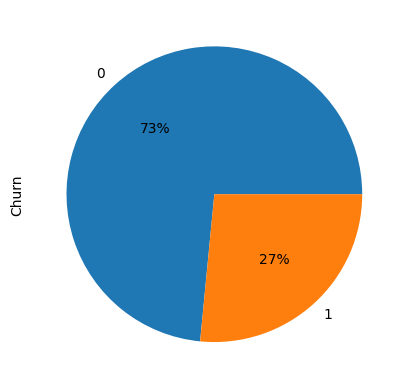

In [19]:
data["Churn"].value_counts().plot(kind="pie",autopct='%1.0f%%')

**Upsampling Needed**

len(data_majority)=5174
len(data_minority)=1869


<Axes: ylabel='Churn'>

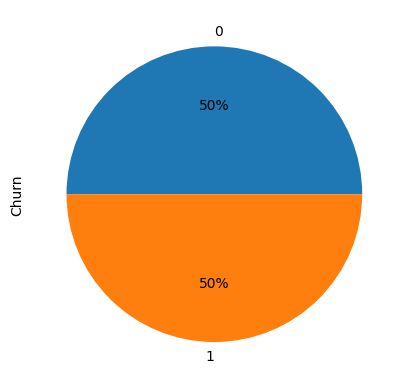

In [20]:
from sklearn.utils import resample

data_majority = data[data['Churn'] == 0]
data_minority = data[data['Churn'] == 1]

print(f"{len(data_majority)=}")
print(f"{len(data_minority)=}")

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=5)

data_balanced = pd.concat([data_majority, data_minority_upsampled])

data_balanced["Churn"].value_counts().plot(kind="pie",autopct='%1.0f%%')

In [21]:
from sklearn.model_selection import train_test_split

y = data_balanced['Churn']
X = data_balanced.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [22]:
len(X_test) == len(y_test)

True

**Normalize Numerical Features**

In [23]:
normalizers = normalizer_(X_train, numerical_features)

In [24]:
for feature in numerical_features:
  X_test[feature] = normalizers[feature].transform(X_test[[feature]])

In [25]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1000,0,0,0,0,-0.858558,1,1,0.959353,-0.623654,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6742,1,0,1,1,1.011940,1,0,0.398576,0.913884,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4680,1,1,0,0,-0.401325,1,1,-0.323663,-0.484352,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1761,1,0,0,0,1.261340,1,1,-1.502509,-0.232923,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5773,0,0,0,0,0.305307,1,0,-0.249008,-0.018014,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Information Gain**

In [27]:
import pandas as pd
import numpy as np

def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(data, feature_name, target_name):
    total_entropy = calculate_entropy(data[target_name])

    unique_values = data[feature_name].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature_name] == value]
        subset_weight = len(subset) / len(data)
        subset_entropy = calculate_entropy(subset[target_name])
        weighted_entropy += subset_weight * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain


In [28]:
information_gain_feature = dict()
for feature in X_train.columns:
  information_gain_feature[feature] = calculate_information_gain(pd.concat([X_train, y_train], axis=1), feature, 'Churn')
#print(f"Info gain on {feature}: {information_gain_feature[feature]}")

In [29]:
sorted_dict_asc = dict(sorted(information_gain_feature.items(), key=lambda item: item[1], reverse=True))
sorted_dict_asc

{'TotalCharges': 0.9463720394814812,
 'MonthlyCharges': 0.3690906827647479,
 'Contract_Month-to-month': 0.18879541628773056,
 'tenure': 0.15872367352300232,
 'Contract_Two year': 0.12749394537203695,
 'OnlineSecurity_No': 0.1251242774313608,
 'TechSupport_No': 0.11279443490260199,
 'InternetService_Fiber optic': 0.09144805480403617,
 'PaymentMethod_Electronic check': 0.0771726034846103,
 'InternetService_No': 0.06886069872944434,
 'OnlineSecurity_No internet service': 0.06886069872944434,
 'OnlineBackup_No internet service': 0.06886069872944434,
 'DeviceProtection_No internet service': 0.06886069872944434,
 'TechSupport_No internet service': 0.06886069872944434,
 'StreamingTV_No internet service': 0.06886069872944434,
 'StreamingMovies_No internet service': 0.06886069872944434,
 'OnlineBackup_No': 0.06782909345251609,
 'DeviceProtection_No': 0.06435731394817745,
 'Contract_One year': 0.03982532204929268,
 'PaperlessBilling': 0.03856116073019433,
 'OnlineSecurity_Yes': 0.032570539689641

In [30]:
list(sorted_dict_asc.keys())

['TotalCharges',
 'MonthlyCharges',
 'Contract_Month-to-month',
 'tenure',
 'Contract_Two year',
 'OnlineSecurity_No',
 'TechSupport_No',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'OnlineBackup_No',
 'DeviceProtection_No',
 'Contract_One year',
 'PaperlessBilling',
 'OnlineSecurity_Yes',
 'Dependents',
 'TechSupport_Yes',
 'Partner',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'StreamingMovies_No',
 'StreamingTV_No',
 'PaymentMethod_Bank transfer (automatic)',
 'InternetService_DSL',
 'PaymentMethod_Mailed check',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'MultipleLines_Yes',
 'MultipleLines_No',
 'gender',
 'PhoneService',
 'MultipleLines_No phone

In [31]:
k = 15
top_k_features = list(sorted_dict_asc.keys())[:k]
top_k_features

['TotalCharges',
 'MonthlyCharges',
 'Contract_Month-to-month',
 'tenure',
 'Contract_Two year',
 'OnlineSecurity_No',
 'TechSupport_No',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service']

In [32]:
X_train_top_k = X_train[top_k_features]
X_test_top_k = X_test[top_k_features]

***Logistic Regression***

In [33]:
class LogisticRegression:
    def __init__(self, error_thres=0.5, learning_rate=0.01, n_iters=1000):
        self.error_thres = error_thres
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            err = np.mean((y_predicted-y) ** 2) # MSE
            if err < self.error_thres :
              break

            dw = np.dot(X.T, (y_predicted - y))
            # dw = dw / np.linalg.norm(dw)
            # db = (1 / n_samples) * np.sum(y_predicted - y)
            db = np.sum(y_predicted-y)
            # db = db / np.linalg.norm(db)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db



        # print(f"{X.T=}")
        # print(f"{np.dot(X.T,(y_predicted-y))}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

regressor = LogisticRegression(error_thres=0.1)
regressor.fit(X_train_top_k, y_train)
y_pred = regressor.predict(X_test_top_k)

cm = confusion_matrix(y_test, y_pred)


# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (TN + FP)
positive_predictive_value = TP / (TP + FP)
false_discovery_rate = FP / (TP + FP)
f1 = f1_score(y_test, y_pred)


print("LR classification accuracy:", accuracy)
print(f'True Positive Rate: {true_positive_rate:.2f}')
print(f'True Negative Rate: {true_negative_rate:.2f}')
print(f'Positive Predictive Value: {positive_predictive_value:.2f}')
print(f'False Discovery Rate: {false_discovery_rate:.2f}')
print(f'F1 Score: {f1:.2f}')



LR classification accuracy: 0.7260869565217392
True Positive Rate: 0.66
True Negative Rate: 0.79
Positive Predictive Value: 0.76
False Discovery Rate: 0.24
F1 Score: 0.71


***AdaBoost***

In [40]:
import copy
class AdaBoostClassifier:
    def __init__(self, base_estimator, k=50):
        self.k = k
        self.base_estimator = base_estimator
        self.w = []
        self.z = []
        self.models = []
        self.epsilon = 1e-10


    def resample(self,X,y):
      n = len(X)
      # for _ in range(n):
      print(self.w)
      indices = np.random.choice(len(X), size=len(X), replace=True, p=self.w)

      return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.ones(n_samples) / n_samples  # Initialize weights uniformly

        for _ in range(self.k):
            indices = np.random.choice(len(X),size=len(X), replace=True, p=self.w)
            X_ = X.iloc[indices]
            y_ = y.iloc[indices]

            model = copy.deepcopy(self.base_estimator)
            model.fit(X_, y_)

            y_pred = model.predict(X)

            error = np.sum(self.w * (y_pred != y))

            # print(error)
            # if error > 0.5 :
            #   continue
            # print("here")

            error = max(error,self.epsilon)

            matching_predictions = (y_pred == y)  # Find where predictions match y
            self.w[matching_predictions] *= error / (1 - error)
            self.w /= np.sum(self.w)


            z_ = 0.5 * np.log((1.0 - error) / error)

            # w = w * np.exp(-z_ * y_ * y_pred)
            # w /= np.sum(w)
            self.z.append(z_)
            self.models.append(model)
        print(f"{self.models}")

    def predict(self, X):
        final_predictions = np.zeros(len(X))
        print(len(self.models))
        for z_, model in zip(self.z, self.models):
            predictions = z_ * np.array(model.predict(X))
            final_predictions += predictions
        print(f"{final_predictions=}")
        print(f"{final_predictions.shape}")
        y_predicted_cls = [1 if i > 0.5 else 0 for i in final_predictions]
        return np.array(y_predicted_cls)



In [41]:
from sklearn.metrics import accuracy_score
regressor = LogisticRegression(error_thres=0.2)
adaboost_classifier = AdaBoostClassifier(base_estimator=regressor,k=25)

adaboost_classifier.fit(X_train_top_k, y_train)

y_pred = adaboost_classifier.predict(X_test_top_k)

print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")

[<__main__.LogisticRegression object at 0x7e3886ada800>, <__main__.LogisticRegression object at 0x7e3887a5eaa0>, <__main__.LogisticRegression object at 0x7e3887a5e9b0>, <__main__.LogisticRegression object at 0x7e3887a5dba0>, <__main__.LogisticRegression object at 0x7e3887a5e6b0>, <__main__.LogisticRegression object at 0x7e3887a5c8e0>, <__main__.LogisticRegression object at 0x7e3887a5d9c0>, <__main__.LogisticRegression object at 0x7e3887a5ea40>, <__main__.LogisticRegression object at 0x7e3887a5d210>, <__main__.LogisticRegression object at 0x7e388a185600>, <__main__.LogisticRegression object at 0x7e3887a5c370>, <__main__.LogisticRegression object at 0x7e3887a5db40>, <__main__.LogisticRegression object at 0x7e3887a5c9a0>, <__main__.LogisticRegression object at 0x7e3887a5c160>, <__main__.LogisticRegression object at 0x7e3887a5db70>, <__main__.LogisticRegression object at 0x7e3886adb6d0>, <__main__.LogisticRegression object at 0x7e3887a5dbd0>, <__main__.LogisticRegression object at 0x7e3886